In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data=pd.read_csv('data_for_lr.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data processing

In [5]:


data=data.dropna()
print("shape of the data ={}",format(data.shape))

shape of the data ={} (699, 2)


# splitting the data

In [6]:
#training input and output
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
#validation data input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [7]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


# <font color='green'>Linear regression</font>

## Forward propagation

f(x)=mx+c

In [8]:
def forward_propagation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    
    predictions=np.multiply(m,train_input)+c
    return predictions

### Cost Function1

summation(1/2n*(y-f(x))^2)

In [9]:
def cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost


### Gradient descent for backpropagation

df=y-f(x)-y

dm=df*x

dc=df*1

d(cost)/dm=df*df/dm

In [10]:
def backward_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=predictions-train_output
    dm=np.mean(np.multiply(train_input,df))
    dc=np.mean(df)
    
    derivatives['dm']=dm
    derivatives['dc']=dc
    
    return derivatives

### Update Parameters

m=m-(learning_rate*dm)

c=c-(learning_rate*dc)

In [11]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m']=parameters['m']-learning_rate*derivatives['dm']
    parameters['c']=parameters['c']-learning_rate*derivatives['dc']
    
    return parameters

## Model training

In [12]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training 

Iteration = 1, Loss = 2942.96215331693


<Figure size 640x480 with 0 Axes>

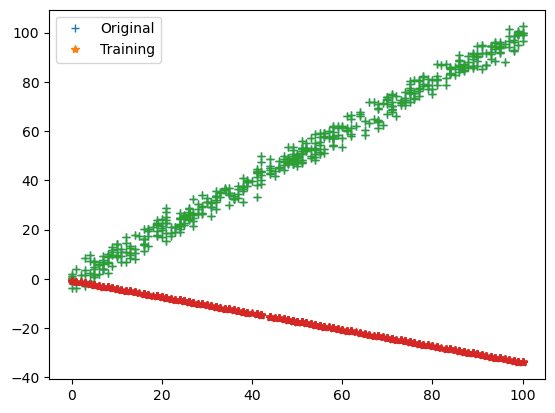

Iteration = 2, Loss = 1337.3852013648957


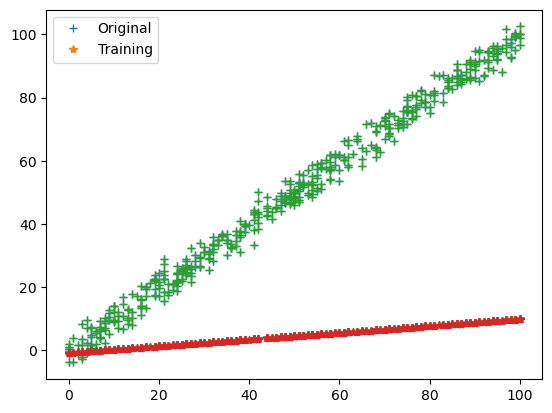

Iteration = 3, Loss = 608.9331586628151


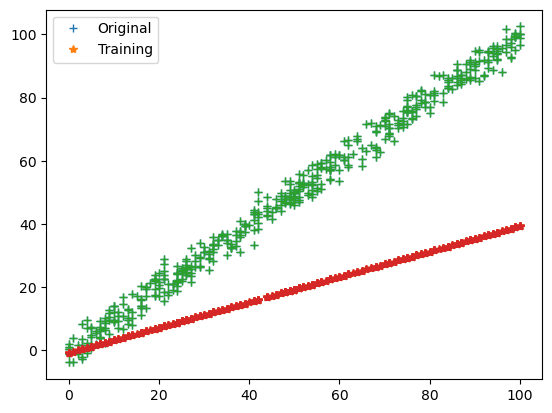

Iteration = 4, Loss = 278.43365882719854


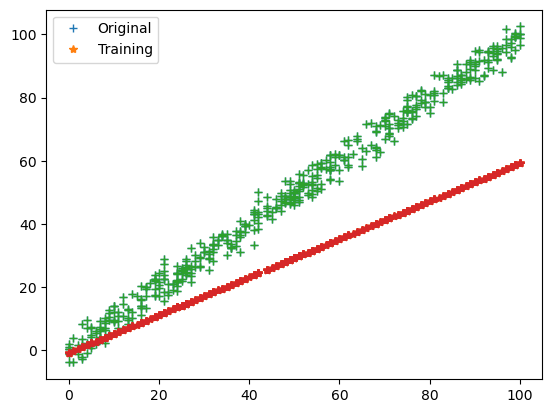

Iteration = 5, Loss = 128.4856684787949


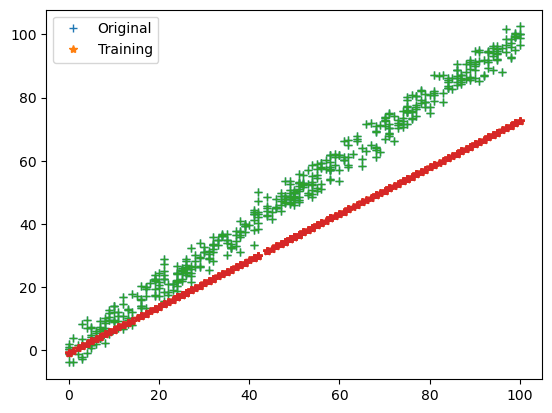

Iteration = 6, Loss = 60.454097971093276


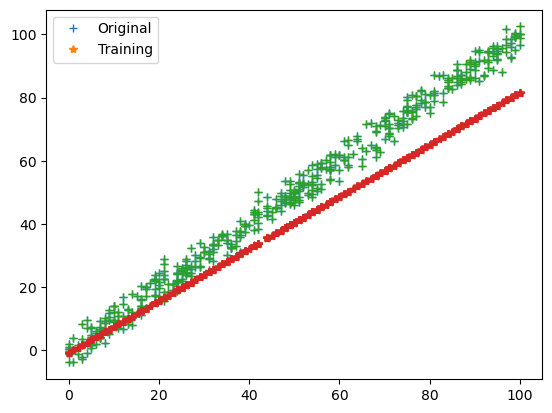

Iteration = 7, Loss = 29.588097879181248


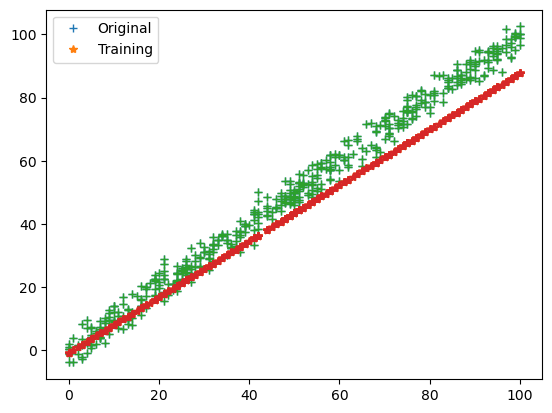

Iteration = 8, Loss = 15.58415825109085


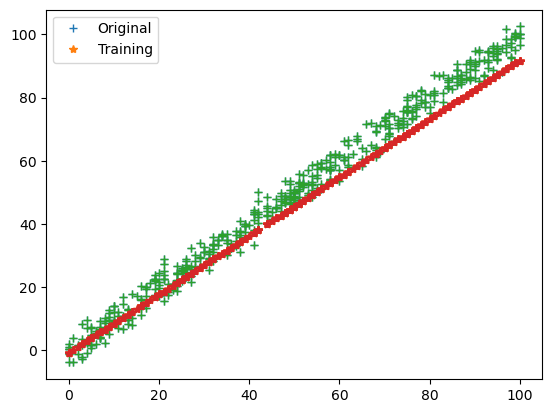

Iteration = 9, Loss = 9.23055413260979


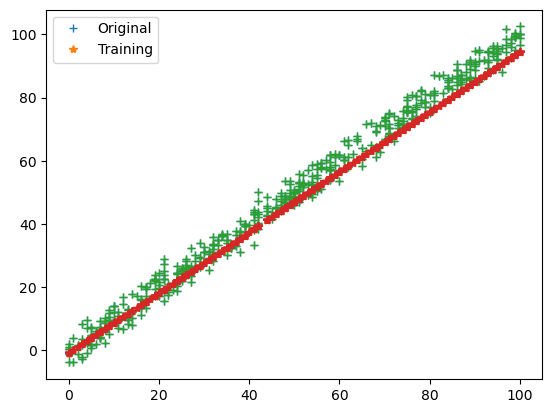

Iteration = 10, Loss = 6.3479157087257


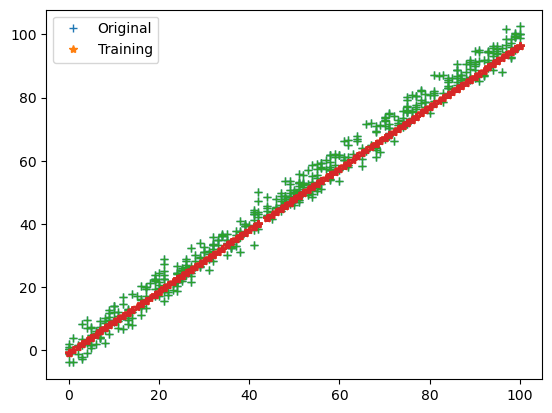

Iteration = 11, Loss = 5.04005826512529


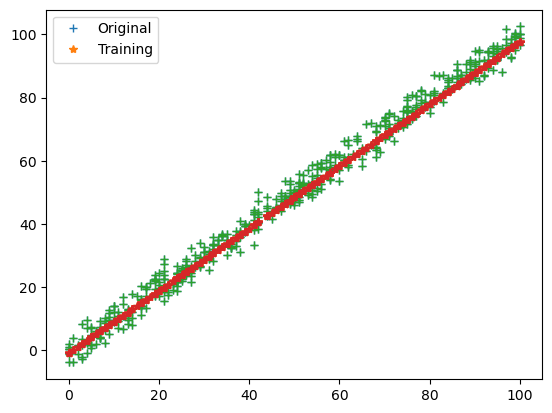

Iteration = 12, Loss = 4.446680696632222


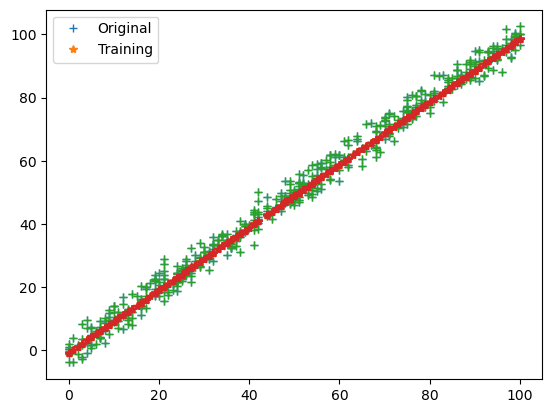

Iteration = 13, Loss = 4.177463438923057


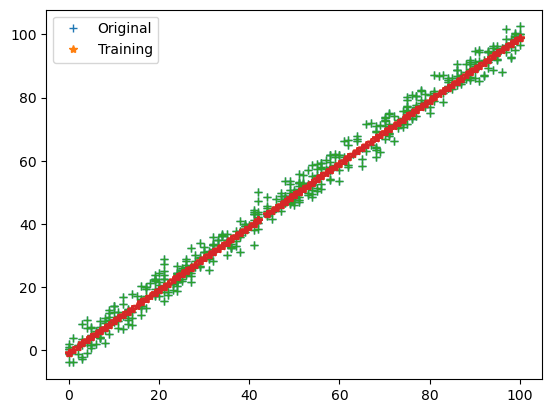

Iteration = 14, Loss = 4.055318073330184


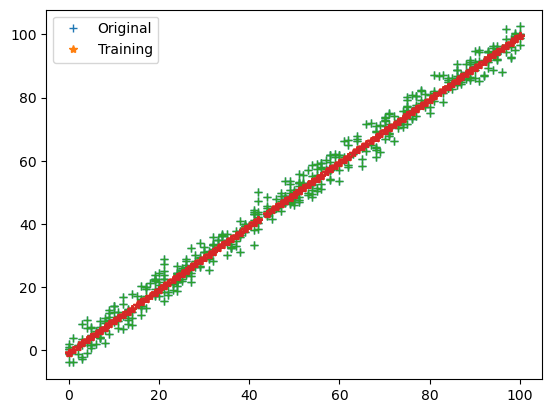

Iteration = 15, Loss = 3.999899388153697


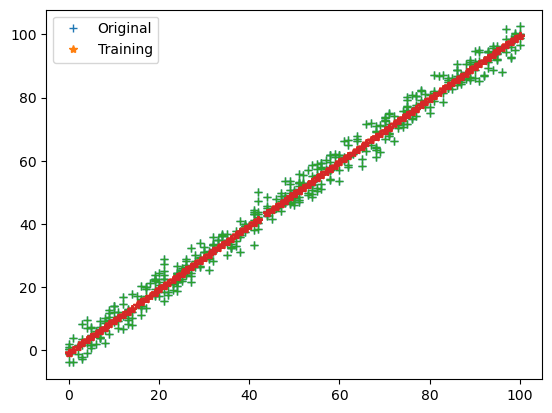

Iteration = 16, Loss = 3.974754671851662


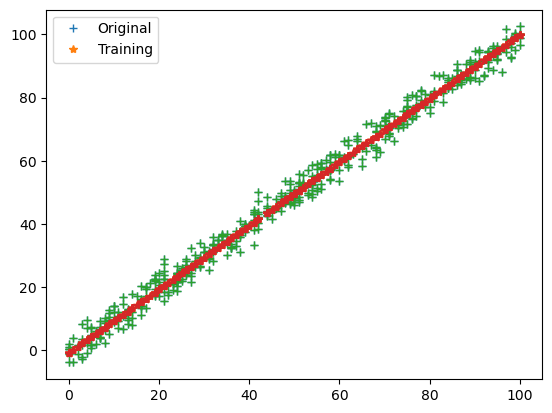

Iteration = 17, Loss = 3.9633452888209852


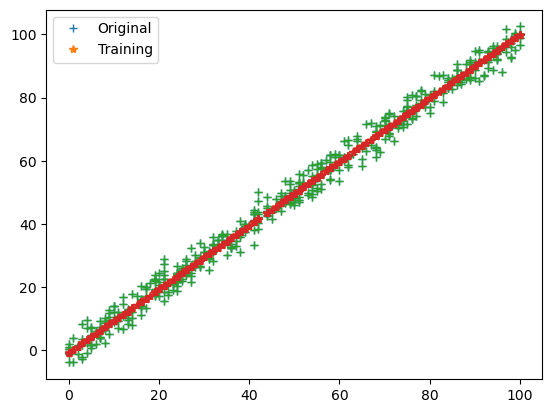

Iteration = 18, Loss = 3.95816764176966


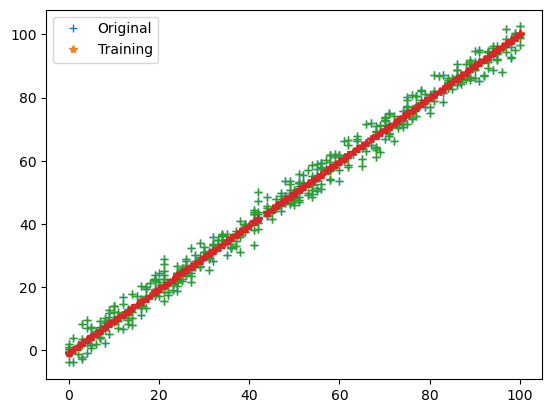

Iteration = 19, Loss = 3.9558173402950065


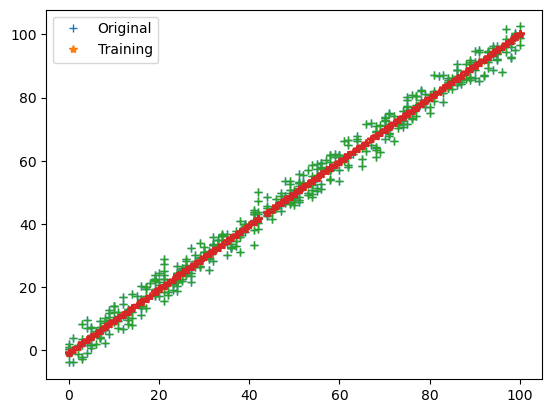

Iteration = 20, Loss = 3.954749808700487


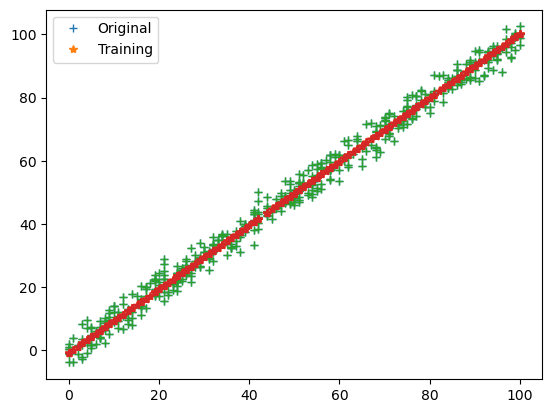

In [15]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [17]:
print(parameters)

{'m': 1.0094015158294065, 'c': -0.8237135213592748}


## Let's Predict 

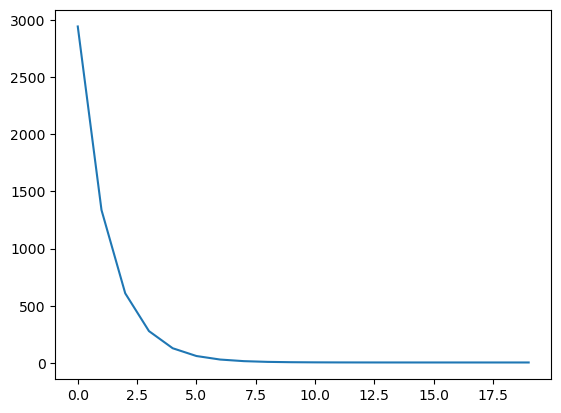

In [21]:
plt.plot(loss)

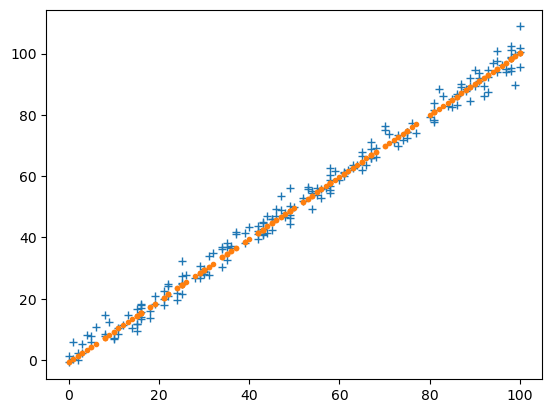

In [19]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for test data

In [20]:
cost_function(test_predictions, test_output)

4.131870871476024